In [102]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sn
import pickle

In [103]:
dataset = pd.read_csv('churn_data.csv')

In [104]:
dataset.head()

user  churn   age  ... rewards_earned  reward_rate  is_referred
0  55409      0  37.0  ...            NaN         0.00            0
1  23547      0  28.0  ...           44.0         1.47            1
2  58313      0  35.0  ...           65.0         2.17            0
3   8095      0  26.0  ...           33.0         1.10            1
4  61353      1  27.0  ...            1.0         0.03            0

[5 rows x 31 columns]

In [105]:
dataset.shape

(27000, 31)

In [106]:
dataset['churn'].value_counts()

0    15826
1    11174
Name: churn, dtype: int64

In [107]:
dataset.describe()

user         churn  ...   reward_rate   is_referred
count  27000.000000  27000.000000  ...  27000.000000  27000.000000
mean   35422.702519      0.413852  ...      0.907684      0.318037
std    20321.006678      0.492532  ...      0.752016      0.465723
min        1.000000      0.000000  ...      0.000000      0.000000
25%    17810.500000      0.000000  ...      0.200000      0.000000
50%    35749.000000      0.000000  ...      0.780000      0.000000
75%    53244.250000      1.000000  ...      1.530000      1.000000
max    69658.000000      1.000000  ...      4.000000      1.000000

[8 rows x 28 columns]

In [108]:
dataset.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [109]:
# Cleaning Data
dataset[dataset.credit_score < 300]
dataset = dataset[dataset.credit_score >= 300]

In [110]:
# Removing NaN
dataset.isna().any()

user                       False
churn                      False
age                        False
housing                    False
credit_score               False
deposits                   False
withdrawal                 False
purchases_partners         False
purchases                  False
cc_taken                   False
cc_recommended             False
cc_disliked                False
cc_liked                   False
cc_application_begin       False
app_downloaded             False
web_user                   False
app_web_user               False
ios_user                   False
android_user               False
registered_phones          False
payment_type               False
waiting_4_loan             False
cancelled_loan             False
received_loan              False
rejected_loan              False
zodiac_sign                False
left_for_two_month_plus    False
left_for_one_month         False
rewards_earned              True
reward_rate                False
is_referre

In [111]:
dataset.isna().sum()

user                          0
churn                         0
age                           0
housing                       0
credit_score                  0
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             1190
reward_rate                   0
is_referred                   0
dtype: i

In [112]:
dataset = dataset.drop(columns = ['credit_score', 'rewards_earned'])

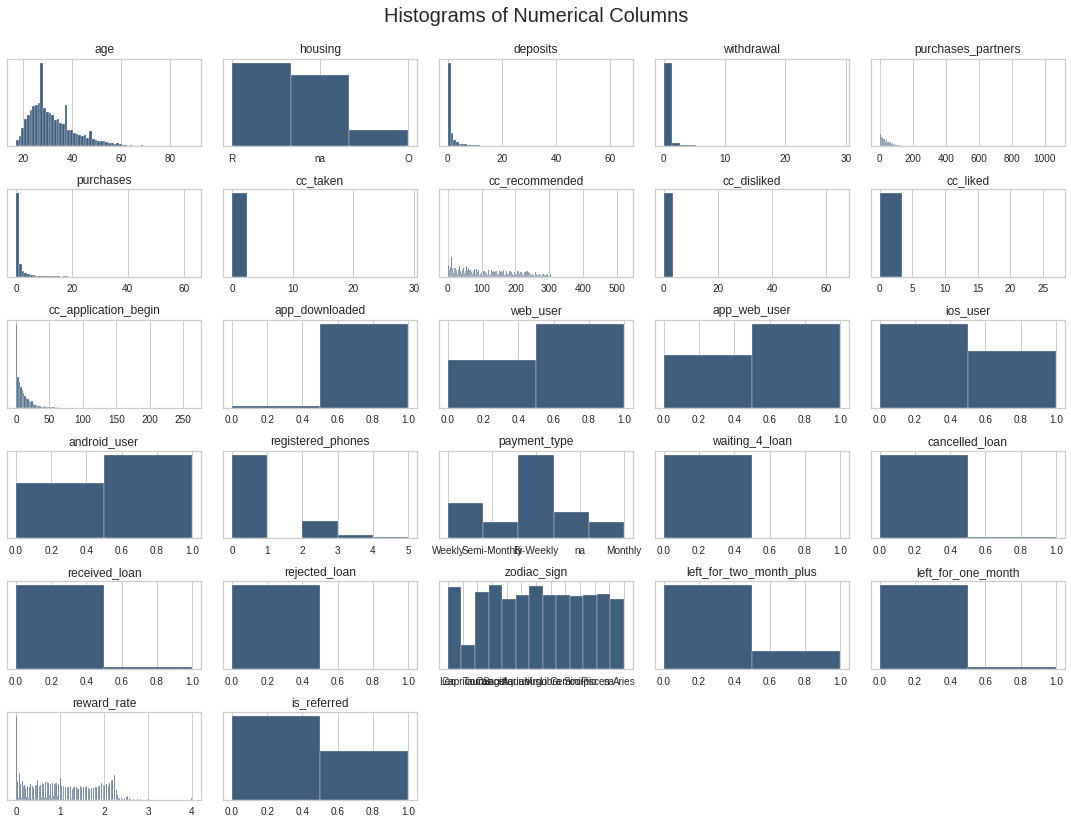

In [113]:
## Histograms
dataset2 = dataset.drop(columns = ['user', 'churn'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])

    vals = np.size(dataset2.iloc[:, i - 1].unique())
    
    plt.hist(dataset2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

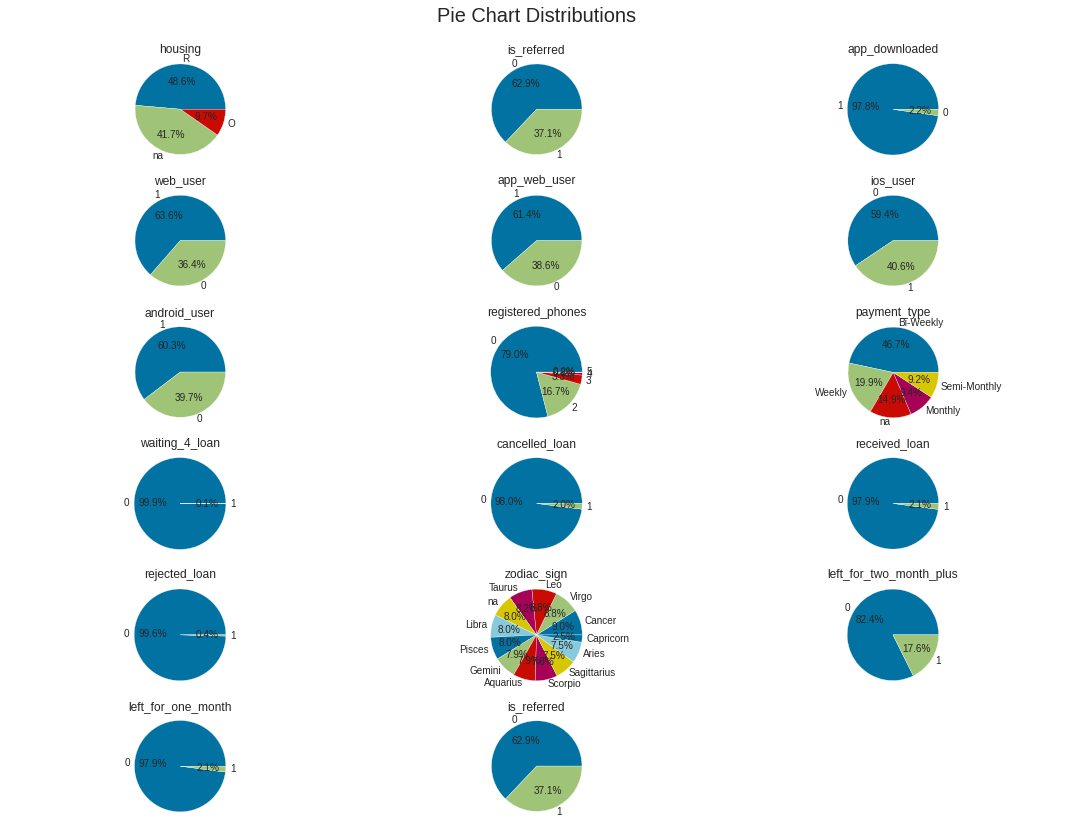

In [114]:
## Pie Plots
dataset2 = dataset[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset2.shape[1] + 1):
    plt.subplot(6, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i - 1])
   
    values = dataset2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [115]:
## Exploring Uneven Features
dataset[dataset2.waiting_4_loan == 1].churn.value_counts()

0    15
1     3
Name: churn, dtype: int64

In [116]:
dataset[dataset2.cancelled_loan == 1].churn.value_counts()

0    194
1    187
Name: churn, dtype: int64

In [117]:
dataset[dataset2.received_loan == 1].churn.value_counts()

1    233
0    162
Name: churn, dtype: int64

In [118]:
dataset[dataset2.rejected_loan == 1].churn.value_counts()

1    64
0    17
Name: churn, dtype: int64

In [119]:
dataset[dataset2.left_for_one_month == 1].churn.value_counts()

1    207
0    184
Name: churn, dtype: int64

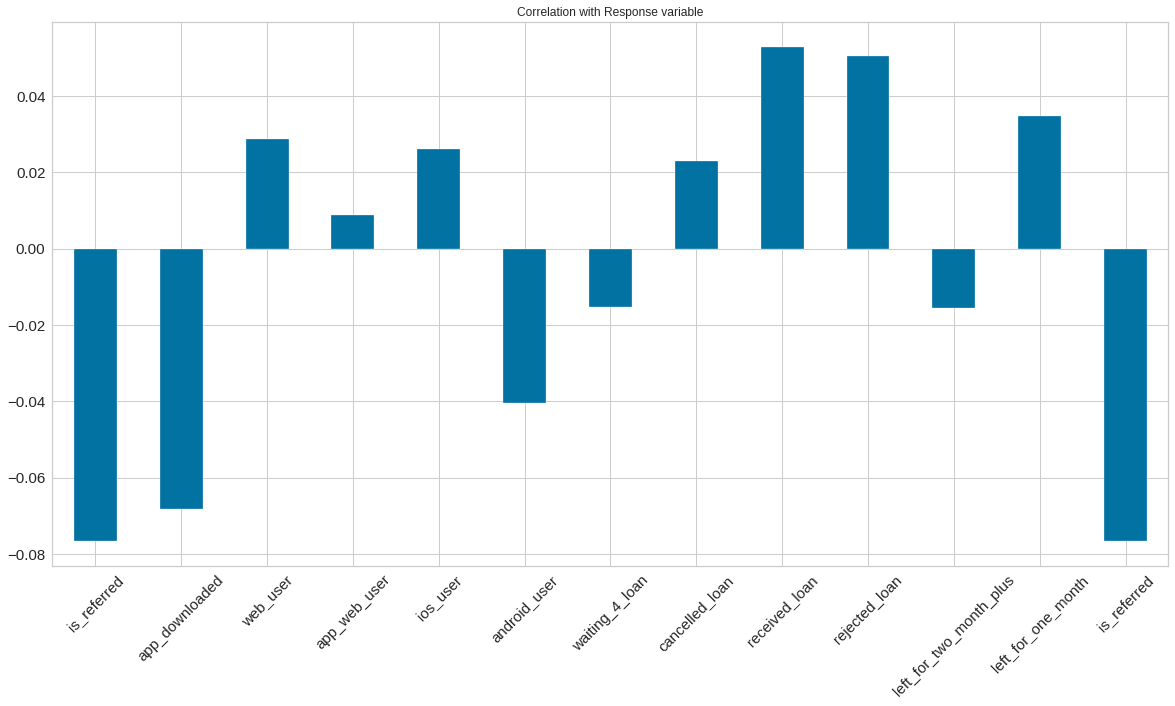

In [120]:
## Correlation with Response Variable
dataset2.drop(columns = ['housing', 'payment_type',
                         'registered_phones', 'zodiac_sign']
    ).corrwith(dataset.churn).plot.bar(figsize=(20,10),
              title = 'Correlation with Response variable',
              fontsize = 15, rot = 45,
              grid = True)

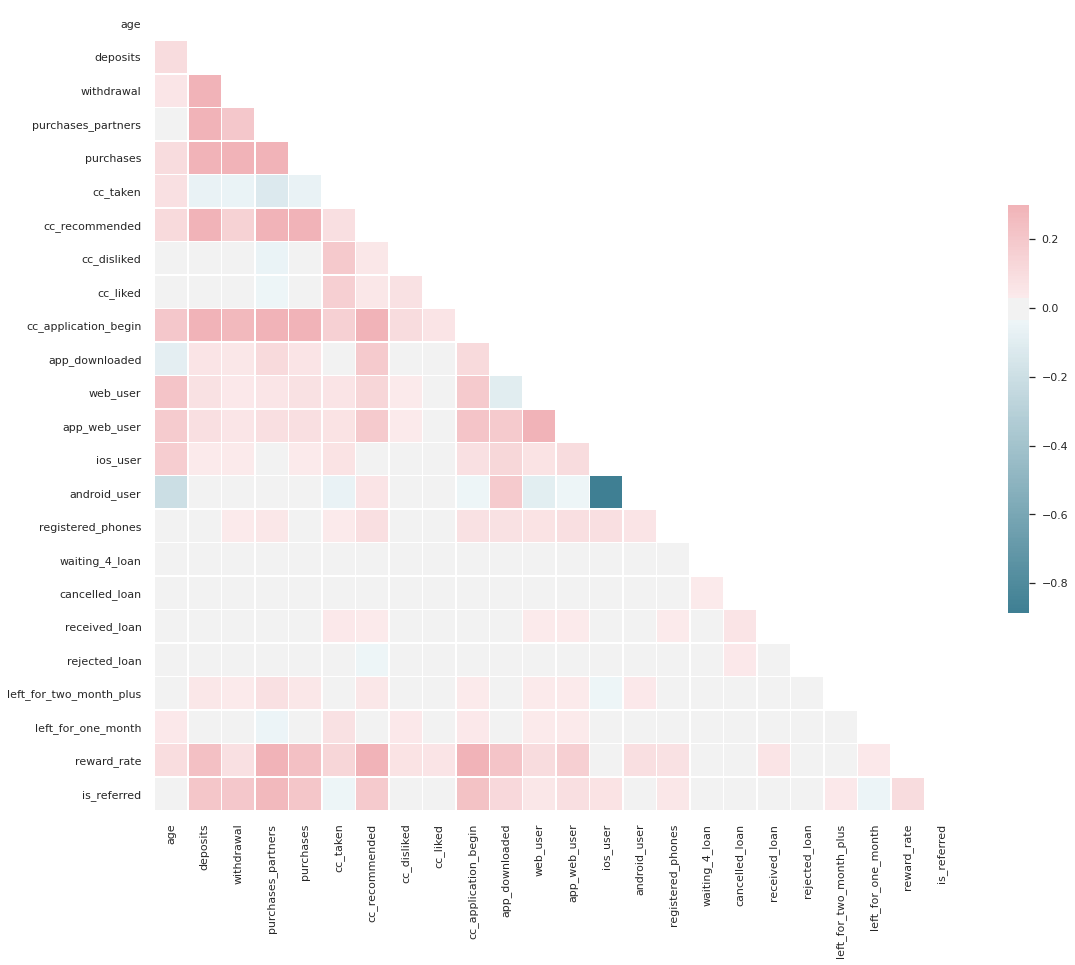

In [121]:

## Correlation Matrix
sn.set(style="white")

# Compute the correlation matrix
corr = dataset.drop(columns = ['user', 'churn']).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sn.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [122]:
# Removing Correlated Fields
dataset = dataset.drop(columns = ['app_web_user'])

In [123]:
## Note: Although there are somewhat correlated fields, they are not colinear
## These feature are not functions of each other, so they won't break the model
## But these feature won't help much either. Feature Selection should remove them.

dataset.to_csv('new_churn_data.csv', index = False)

In [124]:
data = pd.read_csv('new_churn_data.csv')

In [125]:
## Data Preparation
user_identifier = data['user']
data = data.drop(columns = ['user'])

In [126]:
data.head()

churn   age housing  ...  left_for_one_month  reward_rate  is_referred
0      0  28.0       R  ...                   0         1.47            1
1      0  35.0       R  ...                   0         2.17            0
2      0  26.0       R  ...                   0         1.10            1
3      1  32.0       R  ...                   0         1.83            0
4      0  21.0      na  ...                   0         0.07            0

[5 rows x 27 columns]

In [127]:
# One-Hot Encoding
data.housing.value_counts()
data.groupby('housing')['churn'].nunique().reset_index()
data = pd.get_dummies(data)
data.columns
data = data.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])

In [128]:
data.head(2)

churn   age  ...  zodiac_sign_Taurus  zodiac_sign_Virgo
0      0  28.0  ...                   0                  0
1      0  35.0  ...                   0                  0

[2 rows x 42 columns]

In [129]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns = 'churn'), data['churn'],
                                                    test_size = 0.2,
                                                    random_state = 0)

In [130]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

**Model Building**

In [131]:
# Fitting Model to the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
# Predicting Test Set
y_pred = classifier.predict(X_test)

In [133]:
# Evaluating Results
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred) # tp / (tp + fp)
recall_score(y_test, y_pred) # tp / (tp + fn)
f1_score(y_test, y_pred)

0.5482198409955065

Test Data Accuracy: 0.6554


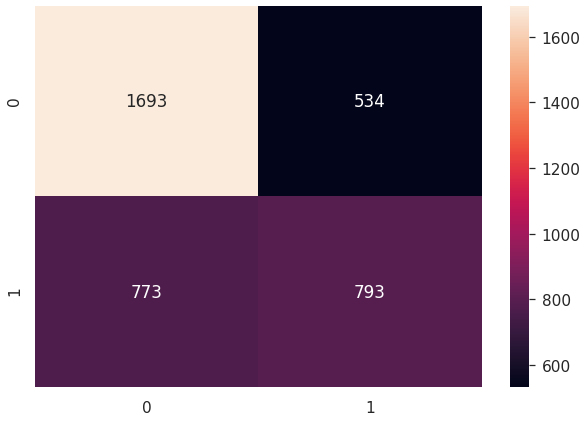

In [134]:
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))

In [135]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("SVM Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

SVM Accuracy: 0.664 (+/- 0.030)


In [136]:
filename = 'LogisticRegression.pkl'
outfile = open(filename,'wb')

pickle.dump(LogisticRegression,outfile)
outfile.close()

In [137]:

# Analyzing Coefficients
pd.concat([pd.DataFrame(X_train.columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

features      coef
0                         age -0.182474
1                    deposits  0.183139
2                  withdrawal  0.032190
3          purchases_partners -0.796301
4                   purchases -0.315183
5                    cc_taken  0.059344
6              cc_recommended  0.025892
7                 cc_disliked -0.008153
8                    cc_liked -0.008796
9        cc_application_begin  0.044694
10             app_downloaded -0.054925
11                   web_user  0.133293
12                   ios_user  0.111108
13               android_user  0.030726
14          registered_phones  0.085527
15             waiting_4_loan -0.040588
16             cancelled_loan  0.055788
17              received_loan  0.112926
18              rejected_loan  0.097745
19    left_for_two_month_plus  0.020331
20         left_for_one_month  0.041455
21                reward_rate -0.247723
22                is_referred  0.049844
23                  housing_O -0.051656
24                  housing_R  0.034079
25     payment_type_Bi-Weekly -0.081123
26       payment_type_Monthly -0.045363
27  payment_type_Semi-Monthly -0.060519
28        payment_type_Weekly  0.039678
29       zodiac_sign_Aquarius -0.019453
30          zodiac_sign_Aries  0.020961
31         zodiac_sign_Cancer  0.036391
32      zodiac_sign_Capricorn  0.053639
33         zodiac_sign_Gemini  0.002572
34            zodiac_sign_Leo  0.017501
35          zodiac_sign_Libra  0.007375
36         zodiac_sign_Pisces  0.068073
37    zodiac_sign_Sagittarius  0.016421
38        zodiac_sign_Scorpio  0.003397
39         zodiac_sign_Taurus  0.016601
40          zodiac_sign_Virgo  0.026412

In [138]:
!pip install pycaret

In [139]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [145]:
data = data.sample(frac=0.95, random_state=786).reset_index(drop=True)
data_unseen = data.drop(data.index).reset_index(drop=True)

In [147]:
print ('Data for Modeling: ' + str(data.shape)
print ('Unseen Data For Predictions: ' + str(data_unseen.shape))

SyntaxError: ignored

In [0]:
from pycaret.classification import *

In [0]:
exp_clf101 = setup(data = data1, target = 'churn', session_id=123) 

In [0]:
compare_models()

In [0]:
catboost = create_model('catboost')

In [0]:
lightgbm = create_model('lightgbm')

In [0]:
gbc = create_model('gbc')

In [0]:
tuned_catboost = tune_model('catboost')

In [0]:
tuned_lightgbm = tune_model('lightgbm')

In [0]:
tuned_gbc = tune_model('gbc')

**AUC Plot**

In [0]:
plot_model(tuned_catboost, plot = 'auc')

In [0]:
plot_model(tuned_lightgbm, plot = 'auc')

In [0]:
plot_model(tuned_gbc, plot = 'auc')

**Precision-Recall Curve**

In [0]:
plot_model(tuned_catboost, plot = 'pr')

In [0]:
plot_model(tuned_lightgbm, plot = 'pr')

In [0]:
plot_model(tuned_gbc, plot = 'pr')

**Feature Importance Plot**

In [0]:
plot_model(tuned_lightgbm, plot='feature')

In [0]:
plot_model(tuned_gbc, plot='feature')

**Confusion Matrix**

In [0]:
interpret_model(tuned_catboost, plot = 'correlation')

In [0]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [0]:
plot_model(tuned_gbc, plot = 'confusion_matrix')

In [0]:
interpret_model(tuned_catboost)

In [0]:
evaluate_model(tuned_lightgbm)

In [0]:
evaluate_model(tuned_gbc)

**Predict on test / hold-out Sample**

In [0]:
predict_model(tuned_catboost);

In [0]:
predict_model(tuned_lightgbm);

In [0]:
predict_model(tuned_gbc);

**Finalize Model for Deployment**

In [0]:
final_catboost = finalize_model(tuned_catboost)

In [0]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [0]:
final_gbc = finalize_model(tuned_gbc)

In [0]:
#Final Cat Boost Classifier model parameters for deployment
print(final_catboost)

In [0]:
#Final Light Gradient Boosting model parameters for deployment
print(final_lightgbm)

In [0]:
#Final Gaussian Process model parameters for deployment
print(final_gbc)

In [0]:
predict_model(final_catboost);

In [0]:
predict_model(final_lightgbm);

In [0]:
predict_model(final_gbc);

**Predict on unseen data**

In [0]:
unseen_predictions = predict_model(final_catboost, data=data_unseen)
unseen_predictions.head()

In [0]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

In [0]:
unseen_predictions = predict_model(final_gbc, data=data_unseen)
unseen_predictions.head()